In [1]:
import scipy.spatial
import random
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import matplotlib.colors as mcolors
import networkx as nx
from math import sqrt, pi

In [211]:
def ccw(A,B,C):
    Ax,Ay=A
    Bx,By=B
    Cx,Cy=C
    return (Cy-Ay) * (Bx-Ax) > (By-Ay) * (Cx-Ax)

# Return true if line segments AB and CD intersect
def intersect(A,B,C,D):
    return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)

def edge_intersect(E,F):
    A,B = E
    C,D = F
    return intersect(A,B,C,D)

def line_intersection(E, F):
    xdiff = (E[0][0] - E[1][0], F[0][0] - F[1][0])
    ydiff = (E[0][1] - E[1][1], F[0][1] - F[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*E), det(*F))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

def split_shape(S,line):
    s_boundaries=[(S[i-1], S[i]) for i,s in enumerate(S)]
    shape_lines_and_cuts = [(e,edge_intersect(l, line), l, line_intersection(l, line) if edge_intersect(l, line) else None) for e,l in enumerate(s_boundaries)]
    s1=[]
    s2=[]
    switch=False
    for e,x,l,c in shape_lines_and_cuts:
        #print(e,x,l,c)
        if x:
            print(e,x,l,c)
            if not switch:
                p1=np.array(c)
                s1.append([p1,l[1]])
                s2.append([l[0],p1])
                switch=True
            else:
                p2=np.array(c)
                s1.append([l[0],p2])
                s1.append([p2, p1])
                
                s2.append([p1,p2])
                s2.append([p2,l[1]])

                switch=False
        else:
                
            if switch:
                s1.append(l)
            else:
                pass
                s2.append(l)


    #print("\n".join([str(s) for s in shape_lines_and_cuts]))
    return s1, s2

In [2]:
space_dims = (400,400)

In [3]:
number_of_points = 40

In [4]:
area = float(np.multiply(*space_dims))
ppa=number_of_points/area
tick=space_dims[0]/number_of_points
tick=4+int(number_of_points/6)

In [5]:
rand_point_coords = np.array([np.random.randint(0,space_dims[0],number_of_points),np.random.randint(0,space_dims[1],number_of_points)])
boundary_points=[]
c=0
for x in np.linspace(0, space_dims[0],int(tick)):
    if c>0:
        c=-30
    else:
        c=1
    boundary_points.append(np.array([x,c]))
c=0
for x in np.linspace(0, space_dims[0],int(tick)):
    if c>space_dims[0]:
        c=space_dims[0]-1
    else:
        c=space_dims[0]+30
    boundary_points.append(np.array([x,c]))
x=0
for c in np.linspace(0, space_dims[1],int(tick)):
    if x>0:
        x=-30
    else:
        x=1
    boundary_points.append(np.array([x,c]))
x=0
for c in np.linspace(0, space_dims[1],int(tick)):
    if x>space_dims[1]:
        x=space_dims[1]-1
    else:
        x=space_dims[1]+30
    boundary_points.append(np.array([x,c]))


boundary_points=np.array(boundary_points).T

bpl=len(boundary_points)

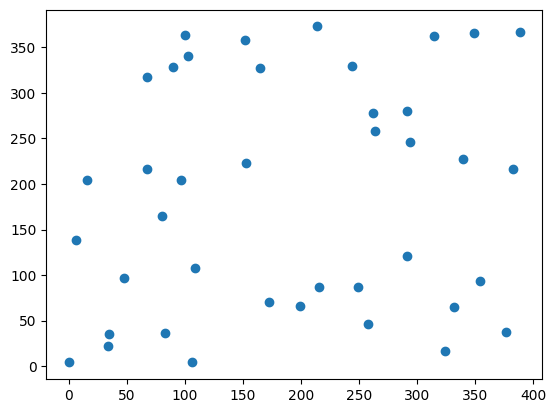

In [6]:
plt.scatter(*rand_point_coords)

In [7]:
pdist=scipy.spatial.distance.cdist(rand_point_coords.T, rand_point_coords.T)

In [8]:
d=(int(sqrt((space_dims[0]**2)+(space_dims[1]**2))/number_of_points)+1)*10
d=10.2
print(d)
links=np.array(np.where((pdist>0)&(pdist<d))).T
dg=nx.Graph()
for f,t in links:
    if f<t:
        dg.add_edge(int(f),int(t))
#fig=plt.figure(figsize=(10,10))
#nx.draw_networkx(dg)
print(len(dg.edges()))

10.2
0


In [9]:
## Scan for a good value of d, which seems to be somewhere around pi (coincidence?)

xs=[]
ys=[]
zs=[]
d_vals=[]
for d in range(1,int(sqrt((space_dims[0]**2)+(space_dims[1]**2))/(number_of_points/200))):
    xs.append(d)
    links=np.array(np.where((pdist>0)&(pdist<d))).T
    dg=nx.Graph()
    for f,t in links:
        if f<t:
            dg.add_edge(int(f),int(t))
    ys.append(len(dg.edges()))
    dgdegree=[v for k,v in dg.degree()]
    avg_degree=sum(dgdegree)/number_of_points
    zs.append(avg_degree)
    print(d, "\t", avg_degree)
    if avg_degree > (pi*2):
        break
    d_vals.append((d,avg_degree))  

1 	 0.0
2 	 0.0
3 	 0.0
4 	 0.0
5 	 0.0
6 	 0.0
7 	 0.0
8 	 0.0
9 	 0.0
10 	 0.0
11 	 0.0
12 	 0.0
13 	 0.0
14 	 0.05
15 	 0.05
16 	 0.05
17 	 0.05
18 	 0.05
19 	 0.1
20 	 0.1
21 	 0.15
22 	 0.15
23 	 0.15
24 	 0.2
25 	 0.2
26 	 0.25
27 	 0.3
28 	 0.35
29 	 0.35
30 	 0.4
31 	 0.4
32 	 0.4
33 	 0.5
34 	 0.55
35 	 0.7
36 	 0.75
37 	 0.8
38 	 0.85
39 	 0.9
40 	 1.0
41 	 1.0
42 	 1.05
43 	 1.1
44 	 1.15
45 	 1.2
46 	 1.25
47 	 1.35
48 	 1.35
49 	 1.5
50 	 1.5
51 	 1.55
52 	 1.65
53 	 1.8
54 	 1.85
55 	 1.95
56 	 2.0
57 	 2.05
58 	 2.1
59 	 2.15
60 	 2.25
61 	 2.3
62 	 2.35
63 	 2.4
64 	 2.6
65 	 2.6
66 	 2.6
67 	 2.65
68 	 2.7
69 	 2.85
70 	 2.9
71 	 3.0
72 	 3.0
73 	 3.05
74 	 3.1
75 	 3.35
76 	 3.45
77 	 3.6
78 	 3.7
79 	 3.8
80 	 3.85
81 	 3.9
82 	 4.0
83 	 4.05
84 	 4.1
85 	 4.1
86 	 4.15
87 	 4.25
88 	 4.25
89 	 4.3
90 	 4.35
91 	 4.35
92 	 4.4
93 	 4.45
94 	 4.55
95 	 4.6
96 	 4.65
97 	 4.75
98 	 4.8
99 	 4.85
100 	 5.0
101 	 5.1
102 	 5.1
103 	 5.15
104 	 5.25
105 	 5.4
106 	 5.45
1

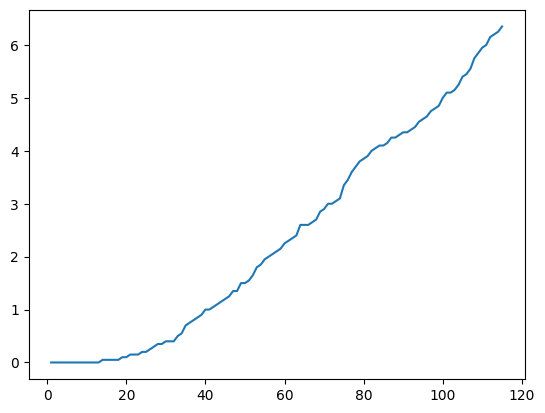

In [10]:
plt.plot(xs,zs)

In [11]:
chosen_d=[d for d,v in d_vals if v>pi][0]

In [12]:
links=np.array(np.where((pdist>0)&(pdist<chosen_d))).T
dg=nx.Graph()
for f,t in links:
    if f<t:
        dg.add_edge(int(f),int(t))

In [13]:
point_coords= np.hstack([rand_point_coords, 
                         boundary_points])

In [14]:
vor = scipy.spatial.Voronoi(point_coords.T, furthest_site=False)
delaunay = scipy.spatial.Delaunay(point_coords.T, furthest_site=False)

(-200.0, 600.0)

<Figure size 640x480 with 0 Axes>

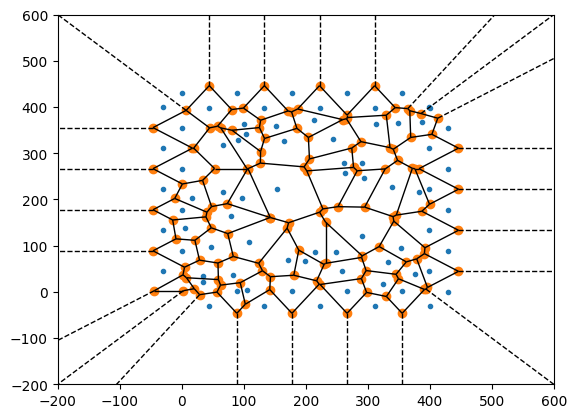

In [221]:
fig = plt.figure()
ax = scipy.spatial.voronoi_plot_2d(vor, alpha=0.5)
#ax = plt.rect(0,0,200,200)
plt.xlim(-200,600)
plt.ylim(-200,600)


In [238]:

live_regions = [vor.regions[r] for r in vor.point_region[0:number_of_points]]
#live_regions = ([vor.regions[r] for r in vor.point_region]) 
shapes=[]
for e,r in enumerate(live_regions) :
    #print(e,r)
    shape=[]
    for v in r:
        shape.append(vor.vertices[v])
    shapes.append(np.array(shape))

In [239]:
shapes

[array([[335.9809591 , 312.22214386],
        [289.02544051, 325.23391408],
        [274.26813472, 311.36204663],
        [277.1609589 , 269.41609589],
        [283.06707317, 262.16768293],
        [328.15853659, 266.14634146],
        [348.15467756, 284.60431775],
        [341.21596653, 308.69155746]]),
 array([[125.37860781, 355.61460102],
        [ 81.15384615, 349.84615385],
        [ 63.01114206, 354.88579387],
        [ 57.77252463, 358.56397207],
        [ 80.5092467 , 394.65400711],
        [ 99.49830711, 397.85081863],
        [127.20709571, 371.46149615]]),
 array([[125.37860781, 355.61460102],
        [ 81.15384615, 349.84615385],
        [127.18421053, 303.81578947],
        [133.55747126, 332.04022989]]),
 array([[  7.70283019,  30.56132075],
        [  2.08974157,  36.89867888],
        [-44.28477366,   2.5       ],
        [  2.5       ,   2.5       ],
        [ 20.21428571,   6.92857143]]),
 array([[180.7579933 ,  35.9914548 ],
        [217.63592163,  23.9509688 ],
    

In [240]:
border_facets=dict()
for i,r in enumerate(live_regions):
    for j in range(len(r)):
        border = tuple(sorted((r[j], r[j-1])))
                           
        if border in border_facets.keys() :
            if not any([b==-1 for b in border]):
                border_facets[border].append(i)
                print(i, border)
        else:
            border_facets[border]=[i]
    
len({k:v for k,v in border_facets.items() if len(v)>3})    

2 (42, 45)
7 (20, 21)
8 (27, 111)
8 (70, 73)
10 (46, 47)
12 (86, 90)
12 (43, 45)
12 (44, 45)
13 (110, 111)
13 (106, 111)
14 (72, 75)
15 (92, 93)
16 (6, 97)
17 (32, 34)
17 (30, 31)
17 (29, 33)
18 (39, 40)
19 (35, 36)
20 (37, 38)
20 (6, 14)
20 (6, 30)
20 (29, 30)
20 (10, 29)
21 (56, 58)
22 (56, 57)
22 (11, 56)
23 (97, 98)
23 (95, 96)
23 (94, 97)
24 (61, 105)
25 (71, 74)
26 (63, 81)
27 (59, 60)
27 (22, 23)
28 (35, 83)
28 (35, 114)
29 (86, 87)
29 (23, 54)
29 (3, 23)
29 (41, 44)
29 (44, 86)
30 (94, 95)
30 (47, 95)
30 (20, 47)
30 (20, 42)
30 (41, 42)
30 (3, 41)
30 (3, 94)
31 (11, 80)
31 (11, 12)
31 (13, 14)
31 (14, 38)
31 (38, 40)
31 (40, 112)
32 (112, 113)
32 (112, 114)
32 (114, 115)
33 (103, 105)
33 (104, 105)
34 (106, 107)
34 (32, 65)
34 (31, 32)
34 (31, 72)
34 (72, 73)
34 (73, 106)
35 (93, 126)
35 (93, 96)
35 (96, 98)
35 (75, 98)
35 (74, 75)
35 (74, 125)
36 (87, 88)
36 (55, 61)
36 (60, 61)
36 (54, 60)
36 (54, 87)
37 (58, 59)
37 (22, 59)
37 (13, 22)
37 (12, 13)
37 (12, 58)
38 (129, 130)
3

0

(-50.0, 455.0)

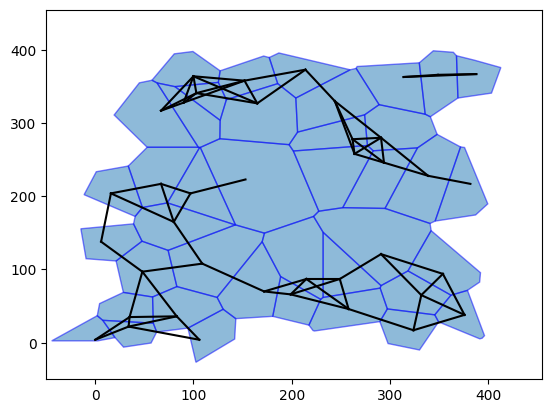

In [241]:
fig, ax = plt.subplots()
for e,r in enumerate(live_regions) :
#for e,r in enumerate([vor.regions[r] for r in vor.point_region]) :
    #print(e,r)
    shape=shapes[e] 
    ax.add_patch(mpatches.Polygon(np.array(shape), edgecolor='blue', alpha=0.5))
    
for f,t in dg.edges():
    x1y1=vor.points[f][0], vor.points[f][1]
    x2y2=vor.points[t][0], vor.points[t][1]
    plt.plot([float(x1y1[0]), float(x2y2[0])], [float(x1y1[1]), float(x2y2[1])],c='k')
plt.xlim(-50,455)
plt.ylim(-50,455)

In [20]:
rg = nx.Graph()
for k,v in border_facets.items():
    if len(v)>1:
        rg.add_edge(int(v[0]), int(v[1]))



In [21]:
clist = ['paleturquoise','mediumseagreen','mediumorchid','tomato','darkorange','palegreen','black']

In [22]:
all_connected = {s for r in nx.connected_components(dg) for s in r}
singletons = [set([s]) for s in set(rg.nodes()) if s not in all_connected]
region_sets = list(nx.connected_components(dg)) + singletons

In [23]:
region_graph=nx.Graph()
for e,r in enumerate(region_sets):
    neighbourset=set()
    for n in r:
        if n in rg.nodes():
            neighbourset.update(rg.neighbors(n))
    for f,r_two in enumerate(region_sets):
        if e!=f:
            if len(neighbourset.intersection(r_two))>0:
                region_graph.add_edge(e,f)


In [24]:
region_lookup = {c:e for e,v in enumerate(region_sets) for c in v}

In [25]:
#nx.draw_networkx(region_graph)

In [26]:
def bicolour_regions(graph):
    processed=set()
    assignments=dict()
    regions_by_size=sorted([(k,v) for k,v in graph.degree()], key=lambda x : x[1], reverse=True)
    r = regions_by_size[0][0]
    
    for r,s in regions_by_size:
        if r not in processed:
            processed.add(r)
            assignments[r]=0
            for a in graph.neighbors(r):
                if a not in processed:
                    processed.add(a)
                    assignments[a]=1
    return assignments
            

In [27]:
region_colors_lookup = bicolour_regions(region_graph)

In [28]:
cell_region_colour_lookup = {k:region_colors_lookup.get(v) for k,v in region_lookup.items()}

In [29]:
clist=['forestgreen','cornflowerblue', '2','3','4','5','black']

(-5.0, 405.0)

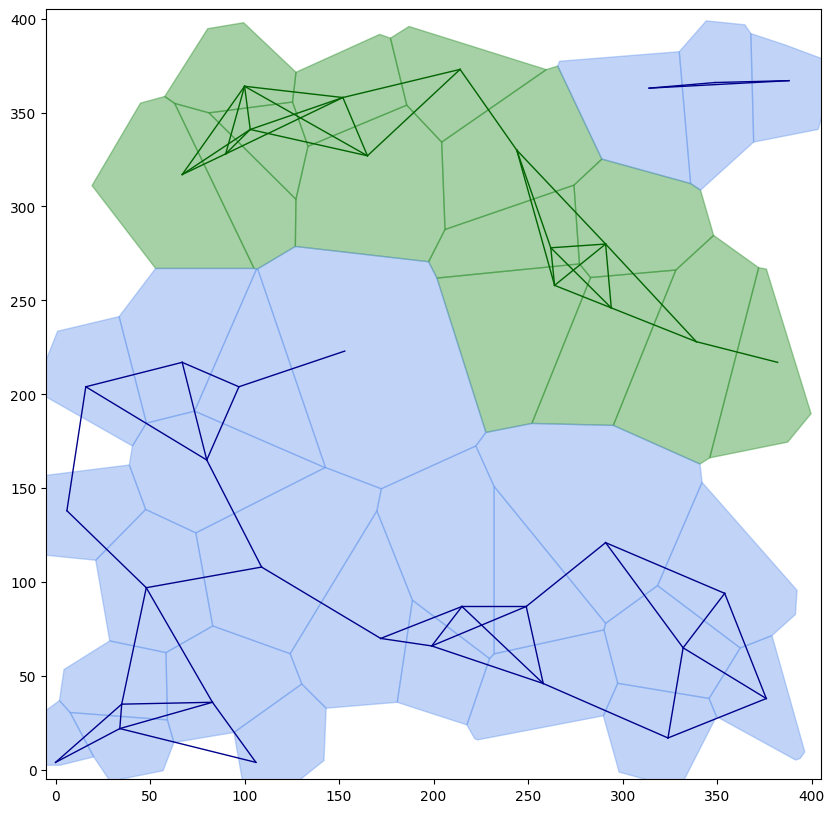

In [32]:
fig=plt.figure(figsize=(10,10))
ax = plt.gca()
live_regions = [vor.regions[r] for r in vor.point_region[0:number_of_points]]
shapes=[]
land_patches=[]
sea_patches=[]
for e,r in enumerate(live_regions) :
    #print(e,r)
    shape=[]
    for v in r:
        shape.append(vor.vertices[v])

    lpatch=mpatches.Polygon(np.array(shape))
    #lpatch.set_color(mcolors.to_rgb(clist[cell_region_colour_lookup.get(e,6)]))
    if cell_region_colour_lookup.get(e,6)==0:
        land_patches.append(lpatch)
    elif cell_region_colour_lookup.get(e,6)==1:
        sea_patches.append(lpatch)
    #ax.add_patch(lpatch)
    #ax.text(*vor.points[e],e, fontsize=8, color='white')
    shapes.append(np.array(shape))

pcollection=PatchCollection(land_patches, edgecolor='green', color='forestgreen', alpha=0.4)
ax.add_collection(pcollection)
pcollection=PatchCollection(sea_patches, edgecolor='blue', color='cornflowerblue', alpha=0.4)
ax.add_collection(pcollection)

for f,t in dg.edges():
    if cell_region_colour_lookup.get(f,6)==0:
        x1y1=vor.points[f][0], vor.points[f][1]
        x2y2=vor.points[t][0], vor.points[t][1]
        plt.plot([float(x1y1[0]), float(x2y2[0])], [float(x1y1[1]), float(x2y2[1])],c='darkgreen',linewidth=1)
    elif cell_region_colour_lookup.get(f,6)==1:
        x1y1=vor.points[f][0], vor.points[f][1]
        x2y2=vor.points[t][0], vor.points[t][1]
        plt.plot([float(x1y1[0]), float(x2y2[0])], [float(x1y1[1]), float(x2y2[1])],c='darkblue',linewidth=1)
plt.xlim(-5,405)
plt.ylim(-5,405)

# Todo list.
1) Cut a shape, or series of shapes, using a line, such that the shapes are bounded by the applied cut-line. 
2) Sub-divide a single voronoi cell (defined by a series of line boundaries) into a shaped voronoi collection (by the application of a random set of points)
3) Determine the rules to generate rivers (adjacent region tiles that don't share a backbone-link)
4) Using degree to determine height - where node degree (of backbones) is on a land region, then it's positive, when it's in an ocean region, then it's negative. Experiment with rising/falling sea-levels.
5) Optional demotion of land regions. i.e. given some integer quota, cycle over the available land-masses, and randomly demote them to being ocean regions. Motivation is to enable tuning of the finished map from archipelago towards continental qualities.
6) Optional region joining - again with a motivation to push the continental quality of a generated map, it might be beneficial to join some adjacent regions together to form a larger set of land-masses. This might take the form of choosing a starting land-mass, and connecting it to surrounding regions.
7) After determining height using method in (4) experiment with raising/lowering sea-levels to explore effects
8) Applying different base temperatures based on latitude, with equatorial, tropical, temperate and polar designations. i.e. Apply Köppen climate classification to cells based on latitude:
   * Tropical climates (A)
   * Dry climates (B)
   * Temperate climates (C) 
   * Continental climates (D)
   * Polar climates (E)
10) Generating tradewinds/oceanic currents/vortices, finding cycles that apply in ocean regions, and using those to apply costal transverse flows. These in turn might adjust local temperature/climates experienced at different cells.

In [34]:
shapes[0]

array([[335.9809591 , 312.22214386],
       [289.02544051, 325.23391408],
       [274.26813472, 311.36204663],
       [277.1609589 , 269.41609589],
       [283.06707317, 262.16768293],
       [328.15853659, 266.14634146],
       [348.15467756, 284.60431775],
       [341.21596653, 308.69155746]])

In [36]:
vor.points[0]

array([291., 280.])

In [194]:
i_line = [[0,300],[350,310]]

In [195]:
# For a given shape, identify if a line intersects it at any point.

lines = [(shapes[0][i-1], shapes[0][i]) for i,s in enumerate(shapes[0])]
for e,l in enumerate(lines):
    if edge_intersect(l, i_line):
        print (e,l)
        print(line_intersection(i_line, l))

0 (array([341.21596653, 308.69155746]), array([335.9809591 , 312.22214386]))
(339.7117202268435, 309.70604914933836)
3 (array([274.26813472, 311.36204663]), array([277.1609589 , 269.41609589]))
(274.5108161258602, 307.8431661750246)


In [196]:
split_shape(shapes[0],i_line)

0 True (array([341.21596653, 308.69155746]), array([335.9809591 , 312.22214386])) (339.7117202268435, 309.70604914933836)
3 True (array([274.26813472, 311.36204663]), array([277.1609589 , 269.41609589])) (274.5108161258602, 307.8431661750246)


([[array([339.71172023, 309.70604915]), array([335.9809591 , 312.22214386])],
  (array([335.9809591 , 312.22214386]), array([289.02544051, 325.23391408])),
  (array([289.02544051, 325.23391408]), array([274.26813472, 311.36204663])),
  [array([274.26813472, 311.36204663]), array([274.51081613, 307.84316618])],
  [array([274.51081613, 307.84316618]), array([339.71172023, 309.70604915])]],
 [[array([341.21596653, 308.69155746]), array([339.71172023, 309.70604915])],
  [array([339.71172023, 309.70604915]), array([274.51081613, 307.84316618])],
  [array([274.51081613, 307.84316618]), array([277.1609589 , 269.41609589])],
  (array([277.1609589 , 269.41609589]), array([283.06707317, 262.16768293])),
  (array([283.06707317, 262.16768293]), array([328.15853659, 266.14634146])),
  (array([328.15853659, 266.14634146]), array([348.15467756, 284.60431775])),
  (array([348.15467756, 284.60431775]), array([341.21596653, 308.69155746]))])

In [197]:
shapes[0]

array([[335.9809591 , 312.22214386],
       [289.02544051, 325.23391408],
       [274.26813472, 311.36204663],
       [277.1609589 , 269.41609589],
       [283.06707317, 262.16768293],
       [328.15853659, 266.14634146],
       [348.15467756, 284.60431775],
       [341.21596653, 308.69155746]])

In [200]:
i_line = [[0,300],[335.9809591 , 312.22214386]]

In [201]:
split_shape(shapes[0],i_line)

3 True (array([274.26813472, 311.36204663]), array([277.1609589 , 269.41609589])) (274.3634033198093, 309.98065186276176)


([[array([274.36340332, 309.98065186]), array([277.1609589 , 269.41609589])],
  (array([277.1609589 , 269.41609589]), array([283.06707317, 262.16768293])),
  (array([283.06707317, 262.16768293]), array([328.15853659, 266.14634146])),
  (array([328.15853659, 266.14634146]), array([348.15467756, 284.60431775])),
  (array([348.15467756, 284.60431775]), array([341.21596653, 308.69155746]))],
 [(array([341.21596653, 308.69155746]), array([335.9809591 , 312.22214386])),
  (array([335.9809591 , 312.22214386]), array([289.02544051, 325.23391408])),
  (array([289.02544051, 325.23391408]), array([274.26813472, 311.36204663])),
  [array([274.26813472, 311.36204663]), array([274.36340332, 309.98065186])]])

In [209]:
a_square = [[10,10],(0,10),(0,0),(10,0)]
a_line = [[0,0], [20,20]]

In [210]:
split_shape(a_square,a_line)

1 True ([10, 10], (0, 10)) (10.0, 10.0)
2 True ((0, 10), (0, 0)) (0.0, 0.0)


([[array([10., 10.]), (0, 10)],
  [(0, 10), array([0., 0.])],
  [array([0., 0.]), array([10., 10.])]],
 [((10, 0), [10, 10]),
  [[10, 10], array([10., 10.])],
  [array([10., 10.]), array([0., 0.])],
  [array([0., 0.]), (0, 0)],
  ((0, 0), (10, 0))])